In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# df = pd.read_csv("./patent.tsv", sep="\t", nrows = 500 )
application_df = pd.read_csv("csv_patent_2019/application_data.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,3,4,5,6,8,9,10,12,13,14,16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
application_df.head()

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,file_location_date,earliest_pgpub_number,earliest_pgpub_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,aia_first_to_file
0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,1014.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,1141.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,1195.0,NaN,NaN,...,2000-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED,NaN
3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,Patented File - (Old Case Added for File Track...,...,1986-08-11,NaN,NaN,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED,false
4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,1286.0,NaN,Patented File - (Old Case Added for File Track...,...,2018-11-06,NaN,NaN,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED,NaN


In [4]:
# Drop the unused columns
application_cleaned = application_df.drop(columns=['confirm_number', 'wipo_pub_number', 'wipo_pub_date', 'aia_first_to_file'])
application_cleaned

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494290,PCT/ZW98/00011,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494291,PCT/ZW98/00012,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494292,PCT/ZW98/00013,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494293,PCT/ZW98/00014,NaN,PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_cleaned.loc[application_cleaned['uspc_class'] == 60]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
3605202,10492806,2004-04-14,Utility,"NGUYEN, HOANG M",3746,60,524000,02157.0012U1,Patent Expired Due to NonPayment of Maintenanc...,2013-09-30,ELECTRONIC,NaN,US20040237520A1,2004-12-02,6.93511e+06,2005-08-30,HEAT FAN ASSEMBLY AND METHOD OF CONTROLLING A FAN,UNDISCOUNTED
3605363,10492978,2004-10-12,Utility,"LAZO, THOMAS E",3745,60,422000,046124-5280,Patent Expired Due to NonPayment of Maintenanc...,2014-06-16,ELECTRONIC,NaN,US20050042121A1,2005-02-24,7.04391e+06,2006-05-16,HYDRAULIC EQUIPMENT,UNDISCOUNTED
3605490,10493105,2004-04-20,Utility,"RICHTER, SHELDON J",3748,60,618000,WEISSE,Patented Case,2006-08-23,ELECTRONIC,NaN,US20040255584A1,2004-12-23,7.10406e+06,2006-09-12,DEVICE FOR PRODUCING MECHANICAL ENERGY,UNDISCOUNTED
3605830,10493445,2004-10-05,Utility,"RICHTER, SHELDON J",3748,60,495000,3502-1057,Patented Case,2006-10-18,ELECTRONIC,NaN,US20050066654A1,2005-03-31,7.13127e+06,2006-11-07,PROCESS AND AN APPARATUS FOR UTILISING WAVE EN...,SMALL
3606789,10494404,2004-09-14,Utility,"RODRIGUEZ, WILLIAM H",3746,60,039182,19036/39835,Patent Expired Due to NonPayment of Maintenanc...,2019-01-07,ELECTRONIC,NaN,US20050011179A1,2005-01-20,7.14357e+06,2006-12-05,GAS TURBINE SYSTEM COMPRISING CLOSED SYSTEM OF...,UNDISCOUNTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463907,PCT/US99/03174,1999-02-12,PCT,"NGUYEN, HOANG M",3746,60,685000,9021.001,PCT - International Search Report Mailed to IB,1999-07-06,MISSING,NaN,NaN,NaN,NaN,NaN,HYDROCARBON COMBUSTION POWER GENERATION SYSTEM...,UNDISCOUNTED
15464122,PCT/US99/03391,1999-02-17,PCT,"TRAN, BINH Q",3746,60,324000,34090-06147,PCT - International Search Report Mailed to IB,1999-05-27,MISSING,NaN,NaN,NaN,NaN,NaN,EXHAUST RESTRICTION DEVICE,UNDISCOUNTED
15464658,PCT/US99/03938,1999-02-24,PCT,"NGUYEN, HOANG M",3746,60,595000,2297-103.PCT,PCT - International Search Report Mailed to IB,1999-05-04,MISSING,NaN,NaN,NaN,NaN,NaN,FREE-PISTON INTERNAL-COMBUSTION ENGINE,UNDISCOUNTED
15465308,PCT/US99/04602,1999-03-01,PCT,"KIM, TAE JUN",3746,60,203100,101643-101,PCT - International Search Report Mailed to IB,1999-08-12,MISSING,NaN,NaN,NaN,NaN,NaN,THREE AXIS THRUSTER,UNDISCOUNTED


In [6]:
application_cleaned['uspc_class'] = application_cleaned['uspc_class'].astype(str)

In [7]:
application_cleaned['uspc_class'].unique()

array(['nan', '380', '000', ..., '902.0', '987', '354.0'], dtype=object)

In [8]:
uspc_class_list = application_cleaned['uspc_class'].unique().tolist()
uspc_class_list

['nan',
 '380',
 '000',
 '419',
 '179',
 '999',
 '423',
 '178',
 '376',
 '075',
 '114',
 '102',
 '095',
 '367',
 '327',
 '073',
 '057',
 '343',
 '228',
 '455',
 '521',
 '342',
 '149',
 '526',
 '329',
 '375',
 'D00',
 '250',
 '244',
 '340',
 '560',
 '023',
 '089',
 '332',
 '310',
 '363',
 '315',
 '117',
 '239',
 '440',
 '324',
 '524',
 '360',
 '060',
 '364',
 '200',
 '198',
 '065',
 '562',
 '034',
 '264',
 '219',
 '427',
 '226',
 '002',
 '260',
 '320',
 '252',
 '086',
 '356',
 '074',
 '525',
 '338',
 '585',
 '435',
 '025',
 '176',
 '015',
 '546',
 '428',
 '307',
 '029',
 '055',
 '156',
 '372',
 '359',
 '318',
 '106',
 '417',
 '132',
 '138',
 '287',
 '528',
 '126',
 '416',
 '004',
 '355',
 '358',
 '148',
 '409',
 '028',
 '353',
 '220',
 '137',
 '044',
 '181',
 'XXX',
 '030',
 '128',
 '062',
 '431',
 '362',
 '222',
 '188',
 '335',
 '210',
 '104',
 '174',
 '033',
 '131',
 '246',
 '038',
 '051',
 '337',
 '350',
 '331',
 '384',
 '548',
 '195',
 '215',
 '514',
 '568',
 '123',
 '099',
 '024',


In [9]:
uspc_class_list.index('60')

1000

In [10]:
uspc_class_list_df = pd.DataFrame(uspc_class_list)
uspc_class_list_df

,0
0,nan
1,380
2,000
3,419
4,179
...,...
1072,0.0
1073,199.0
1074,902.0
1075,987


In [11]:
uspc_class_all = uspc_class_list_df.rename(columns = {0:'uspc_class'})
uspc_class_all

,uspc_class
0,nan
1,380
2,000
3,419
4,179
...,...
1072,0.0
1073,199.0
1074,902.0
1075,987


In [12]:
uspc_class_all.dtypes

uspc_class    object
dtype: object

In [13]:
uspc_class_all.loc[uspc_class_all['uspc_class'] == '60']

,uspc_class
1000,60


In [14]:
application_cleaned.loc[(application_cleaned["application_number"] == 2107244)]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED


In [15]:
# (application_number)=(2107244)

In [16]:
application_cleaned.loc[(application_cleaned["application_number"] == "2107244")]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator


In [17]:
application_cleaned.to_csv("csv_output/application_cleaned.csv")

In [18]:
application_cleaned["application_number"].count()

15494295

In [19]:
# Check out the latest date for patent_issue_date: 2021-04-21, good dataset!

application_cleaned.sort_values(["patent_issue_date"], ascending = False).head(2)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
8610530,15748314,2018-01-29,Utility,"SHEN, BIN",1653,435,404000,MERCK-4681,Notice of Allowance Mailed -- Application Rece...,2019-12-20,ELECTRONIC,NaN,US20180216061A1,2018-08-02,10626364,2020-04-21,METHOD FOR INCREASING THE GLUTATHIONE LEVEL IN...,UNDISCOUNTED
9039493,16227984,2018-12-20,Utility,"VOSTAL, ONDREJ C",2458,709.0,238000,11413/006414-US1,NaN,NaN,ELECTRONIC,NaN,NaN,NaN,10630572,2020-04-21,"OPEN LOOP, CLOSED LOOP, REAL AND NEAR REAL-TIM...",SMALL


In [20]:
# Create most refined DataFrame for future patented cases study
application_cleaned_nona = application_cleaned.loc[(application_cleaned["patent_issue_date"].map(pd.isna) == False) 
                                                    & (application_cleaned["filing_date"].map(pd.isna) == False)
                                                    & (application_cleaned["uspc_class"].map(pd.isna) == False)
                                                    & (application_cleaned["appl_status_desc"] == "Patented Case"), :]


# Calculate days between patent_issue_date and filing_date
df_date_ser = pd.to_datetime(application_cleaned_nona['patent_issue_date'], errors = 'coerce') - pd.to_datetime(application_cleaned_nona['filing_date'], errors = 'coerce')
application_cleaned_nona['patent_issue_and_file_date_delta'] = df_date_ser.dt.days

application_cleaned_nona = application_cleaned_nona.loc[(application_cleaned_nona['patent_issue_and_file_date_delta']) > 0, :]


# application_cleaned_nona['patent_issue_and_file_date_delta'].dtype

<ipython-input-20-383f9eb11c8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_cleaned_nona['patent_issue_and_file_date_delta'] = df_date_ser.dt.days


In [21]:
application_cleaned_nona.sort_values(["patent_issue_and_file_date_delta"], ascending = False).head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
43,2682096,1933-07-25,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-07-12,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6097812,2000-08-01,NaN,UNDISCOUNTED,24479
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
35,2618355,1945-09-24,Utility,"KEITH, JACK W",3641,423,149000,S-2509,Patented Case,2004-06-24,OTHER,2019-02-08,NaN,NaN,6761862,2004-07-13,METHOD OF DETERMINING THE EXTENT TO WHICH A NI...,UNDISCOUNTED,21477


In [22]:
# Since D25 and D12 have close patented rate as I found out in the latter part of the code, making me interested to check on their property: patent_issue_and_file_date_delta, calculate Independent (Two Sample) t-test
application_cleaned_nona.head(5)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
28,2565523,1944-11-28,Utility,"HUNT, BROOKS H",2204,419,002000,NaN,Patented Case,1992-07-09,FILE REPOSITORY (FRANCONIA),2018-06-22,NaN,NaN,5132080,1992-07-21,PRODUCTION OF ARTICLES FROM POWDERED METALS,UNDISCOUNTED,17402
29,2568368,1944-12-15,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-12-26,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6175625,2001-01-16,NaN,UNDISCOUNTED,20486
33,2591067,1945-04-30,Utility,NaN,2202,179,00150M,NaN,Patented Case,1980-07-22,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,4214126,1980-07-22,NaN,UNDISCOUNTED,12867
34,2602618,1945-06-30,Utility,"BENTLEY, STEPHEN",2201,999,005000,NaN,Patented Case,1990-07-18,FILE REPOSITORY (FRANCONIA),2018-08-07,NaN,NaN,4956612,1990-09-11,MAGNETIC MINE FIRING CIRCUIT,UNDISCOUNTED,16509


In [23]:
application_cleaned_nona.dtypes

application_number                  object
filing_date                         object
application_invention_type          object
examiner_full_name                  object
examiner_art_unit                   object
uspc_class                          object
uspc_subclass                       object
atty_docket_number                  object
appl_status_desc                    object
appl_status_date                    object
file_location                       object
file_location_date                  object
earliest_pgpub_number               object
earliest_pgpub_date                 object
patent_number                       object
patent_issue_date                   object
invention_title                     object
small_entity_indicator              object
patent_issue_and_file_date_delta     int64
dtype: object

In [24]:
# # Create database connection
# rds_connection_string = "postgres:useyourpassword@localhost:5432/ETL_USPTO"
# engine = create_engine(f'postgresql://{rds_connection_string}')

In [25]:
# # Confirm tables
# engine.table_names()

In [26]:
# # Load DataFrames into database
# application_cleaned_nona.to_sql(name='application_cleaned_patented', con=engine, if_exists='append', index=True)

In [27]:
# application_cleaned_nona_read = pd.read_sql_query('select * from application_cleaned_patented', con=engine)

In [28]:
# application_cleaned_nona_read

In [29]:
D25_df = application_cleaned_nona.loc[(application_cleaned_nona['uspc_class']) == 'D25', :]
D25_df.head(5)
D25 = D25_df['patent_issue_and_file_date_delta']
D25.mean()

582.0977031196435

In [30]:
D12_df = application_cleaned_nona.loc[(application_cleaned_nona['uspc_class']) == 'D12', :]
D12_df.head(5)
D12 = D12_df['patent_issue_and_file_date_delta']
D12.mean()

549.9327655970641

In [31]:
# Calculate Independent (Two Sample) t-test
sts.ttest_ind(D25, D12, equal_var=False) 

Ttest_indResult(statistic=10.96380215526102, pvalue=7.027939464538541e-28)

In [32]:
#p-value is very small, so can reject the null hypo D25 and D12 mean are the same from the patent_issue_and_file_date_delta perspective

In [33]:
# We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [34]:
# In this section, I am focusing on plotting "patent_issue_and_file_date_delta"

In [35]:
application_cleaned_nona.count()

application_number                  4964842
filing_date                         4964842
application_invention_type          4964817
examiner_full_name                  4900260
examiner_art_unit                   4964731
uspc_class                          4964842
uspc_subclass                       4964796
atty_docket_number                  4734178
appl_status_desc                    4964842
appl_status_date                    4964842
file_location                       4964842
file_location_date                  1477037
earliest_pgpub_number               2913174
earliest_pgpub_date                 2913174
patent_number                       4964842
patent_issue_date                   4964842
invention_title                     4964396
small_entity_indicator              4964832
patent_issue_and_file_date_delta    4964842
dtype: int64

In [36]:
application_cleaned_nona["appl_status_desc"].unique()

array(['Patented Case'], dtype=object)

In [37]:
application_cleaned_nona["patent_issue_and_file_date_delta"].describe().apply(lambda x: format(x, 'f'))

count    4964842.000000
mean         930.683064
std          546.751249
min            1.000000
25%          564.000000
50%          813.000000
75%         1153.000000
max        24479.000000
Name: patent_issue_and_file_date_delta, dtype: object

In [38]:
application_cleaned_nona.loc[(application_cleaned_nona['patent_issue_and_file_date_delta']) == 1, :]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
2035296,8685821,1998-08-31,Utility,"COONEY, JOHN M",1711,252,067000,3518.05,Patented Case,1998-09-04,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,5800729,1998-09-01,MIXTURES OF PENTAFLUOROPROPANE AND A HYDROFLUO...,UNDISCOUNTED,1


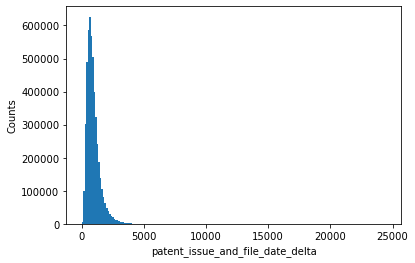

NormaltestResult(statistic=245.21596537649123, pvalue=5.649755859025863e-54)


In [39]:
patent_issue_and_file_date_delta = application_cleaned_nona["patent_issue_and_file_date_delta"]

plt.hist(patent_issue_and_file_date_delta, bins=200)
plt.xlabel('patent_issue_and_file_date_delta')
plt.ylabel('Counts')
plt.savefig('application_data_1', dpi=100)
plt.show()

print(sts.normaltest(patent_issue_and_file_date_delta.sample(500)))

NormaltestResult(statistic=349.8874610517364, pvalue=1.0541518834466348e-76)


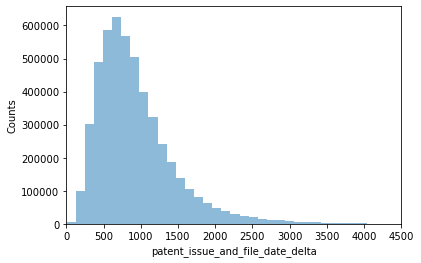

In [40]:
plt.hist(patent_issue_and_file_date_delta, bins=200, alpha=0.5)
plt.xlabel('patent_issue_and_file_date_delta')
plt.ylabel('Counts')
plt.xlim(0,4500)
plt.savefig('application_data_2', dpi=100)
print(sts.normaltest(patent_issue_and_file_date_delta.sample(1000)))


# print(sts.normaltest(temperatures.sample(50)))  #pvalue!!!!!!!!!!!reject or not reject the hypo. when pvalue is high 0.8, can not reject null hypothesis # it is more meaningful when pvalue is small because it helps you to rule out a hypo
# Given the null hypothesis that x came from a normal distribution, if the p-val is very small, it enables them to reject the null hypothesis 

In [41]:
# Under application_invention_type, check on patent_issue_and_file_date_delta

In [42]:
application_cleaned_nona.groupby(['application_invention_type'])

In [43]:
invention_type = application_cleaned_nona.groupby(['application_invention_type']).count()
invention_type

,application_number,filing_date,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
application_invention_type,,,,,,,,,,,,,,,,,,
Design,618563,618563,613820,618563,618563,618560,569580,618563,618563,618563,234724,0,0,618563,618563,618552,618561,618563
Plant,26725,26725,26606,26725,26725,26723,17128,26725,26725,26725,9907,7340,7340,26725,26725,26724,26725,26725
Re-Issue,15184,15184,14633,15183,15184,15184,13765,15184,15184,15184,6997,1,1,15184,15184,15181,15184,15184
Utility,4304345,4304345,4245195,4304250,4304345,4304310,4133703,4304345,4304345,4304345,1225386,2905832,2905832,4304345,4304345,4303924,4304337,4304345


In [44]:
# Use groupby.mean() to show the average patent_issue_and_file_date_delta under each application_invention_type

In [45]:
invention_type = application_cleaned_nona.groupby(['application_invention_type']).mean()
invention_type

,patent_issue_and_file_date_delta
application_invention_type,
Design,575.863870
Plant,598.464247
Re-Issue,1189.242953
Utility,982.813720


<AxesSubplot:xlabel='application_invention_type'>

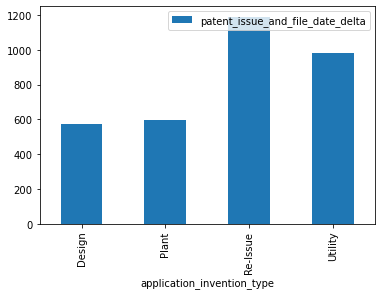

In [46]:
invention_type.plot(kind="bar")

In [47]:
lgtest = application_cleaned_nona.groupby(['application_invention_type'])
lgtest

Design           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Plant       AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Re-Issue             AxesSubplot(0.1,0.15;0.363636x0.340909)
Utility         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

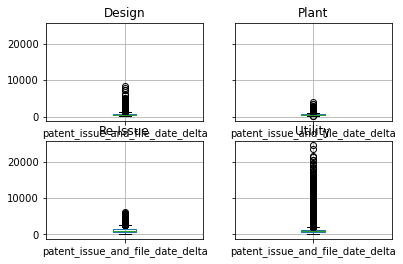

In [48]:
lgtest.boxplot()

In [49]:
application_cleaned_nona['application_invention_type'].unique()

array(['Utility', nan, 'Re-Issue', 'Plant', 'Design'], dtype=object)

In [50]:
utility = application_cleaned_nona.loc[application_cleaned_nona['application_invention_type'] == "Utility", :]
utility.head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
28,2565523,1944-11-28,Utility,"HUNT, BROOKS H",2204,419,002000,NaN,Patented Case,1992-07-09,FILE REPOSITORY (FRANCONIA),2018-06-22,NaN,NaN,5132080,1992-07-21,PRODUCTION OF ARTICLES FROM POWDERED METALS,UNDISCOUNTED,17402
29,2568368,1944-12-15,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-12-26,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6175625,2001-01-16,NaN,UNDISCOUNTED,20486


In [51]:
utility['patent_issue_and_file_date_delta'].mean() # 2.693 years

982.8137198574929

In [52]:
design = application_cleaned_nona.loc[application_cleaned_nona['application_invention_type'] == "Design", :]
design.head(3)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
8756,5242298,1972-04-07,Design,NaN,2902,406,028000,NaN,Patented Case,1980-12-08,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D258252,1981-02-17,NaN,UNDISCOUNTED,3238
13721,5442777,1974-02-15,Design,NaN,2902,D87,00100D,NONE,Patented Case,1978-10-03,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D249823,1978-10-03,TAPE CARTRIDGE AND CASSETTE CABINET,UNDISCOUNTED,1691
17191,5541918,1975-01-20,Design,"GANDY, JAMES M",2901,D12,105000,NaN,Patented Case,1982-03-30,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,D264699,1982-06-01,UTILITY CARRIER CART,UNDISCOUNTED,2689


In [53]:
design['patent_issue_and_file_date_delta'].mean() # 1.578 years

575.8638699695908

In [54]:
# Under uspc_class, check on patent_issue_and_file_date_delta

In [55]:
application_cleaned_nona.count()

application_number                  4964842
filing_date                         4964842
application_invention_type          4964817
examiner_full_name                  4900260
examiner_art_unit                   4964731
uspc_class                          4964842
uspc_subclass                       4964796
atty_docket_number                  4734178
appl_status_desc                    4964842
appl_status_date                    4964842
file_location                       4964842
file_location_date                  1477037
earliest_pgpub_number               2913174
earliest_pgpub_date                 2913174
patent_number                       4964842
patent_issue_date                   4964842
invention_title                     4964396
small_entity_indicator              4964832
patent_issue_and_file_date_delta    4964842
dtype: int64

In [56]:
s = application_cleaned_nona.groupby(['uspc_class'])
s.count()
# pd.set_option('display.max_rows', None)
s['patent_issue_and_file_date_delta'].value_counts().tail(50)

uspc_class  patent_issue_and_file_date_delta
XXX         700                                 1
            715                                 1
            760                                 1
            908                                 1
            985                                 1
            995                                 1
            1033                                1
            1093                                1
            1276                                1
            1307                                1
            1338                                1
            1411                                1
            1456                                1
            1569                                1
            1573                                1
            1716                                1
            1807                                1
            1856                                1
            2112                                1
     

In [57]:
m = pd.DataFrame(s['patent_issue_and_file_date_delta'].value_counts())
m.tail(50)

patent_issue_and_file_date_delta
uspc_class patent_issue_and_file_date_delta                                  
XXX        700                                                              1
           715                                                              1
           760                                                              1
           908                                                              1
           985                                                              1
           995                                                              1
           1033                                                             1
           1093                                                             1
           1276                                                             1
           1307                                                             1
           1338                                                             1
           1411                                                             1
           1456                                                             1
           1569                                                             1
           1573                                                             1
           1716                                                             1
           1807                                                             1
           1856                                                             1
           2112                                                             1
           2435                                                             1
           3515                                                             1
nan        351                                                              1
           393                                                              1
           529                                                              1
           538                                                              1
           543                                                              1
           559                                                              1
           566                                                              1
           581                                                              1
           596                                                              1
           603                                                              1
           617                                                              1
           659                                                              1
           672                                                              1
           733                                                              1
           740                                                              1
           755                                                              1
           764                                                              1
           781                                                              1
           827                                                              1
           859                                                              1
           869                                                              1
           963                                                              1
           1069                                                             1
           1162                                                             1
           1217                                                             1
           1230                                                             1
           1327                                                             1
           1538                                                             1
           1581                                                    

In [58]:
# reset the DataFrame to make it easy to calculate
m = m.rename(columns={"patent_issue_and_file_date_delta": "patented_cases_per_class"})
m
m_resetindex = m.reset_index()
m_resetindex.tail(50)

,uspc_class,patent_issue_and_file_date_delta,patented_cases_per_class
797973,XXX,700,1
797974,XXX,715,1
797975,XXX,760,1
797976,XXX,908,1
797977,XXX,985,1
797978,XXX,995,1
797979,XXX,1033,1
797980,XXX,1093,1
797981,XXX,1276,1
797982,XXX,1307,1


In [59]:
m_resetindex['total_delta'] = m_resetindex['patent_issue_and_file_date_delta'] * m_resetindex['patented_cases_per_class']
type(m_resetindex)
m_resetindex.tail(40)

,uspc_class,patent_issue_and_file_date_delta,patented_cases_per_class,total_delta
797983,XXX,1338,1,1338
797984,XXX,1411,1,1411
797985,XXX,1456,1,1456
797986,XXX,1569,1,1569
797987,XXX,1573,1,1573
797988,XXX,1716,1,1716
797989,XXX,1807,1,1807
797990,XXX,1856,1,1856
797991,XXX,2112,1,2112
797992,XXX,2435,1,2435


In [60]:
x = m_resetindex.groupby('uspc_class').sum() # Will method, more efficient

In [61]:
(x['total_delta']/x['patented_cases_per_class']).tail() # Will method, more efficient, same result as shown below

uspc_class
D99     571.559028
ENG     705.000000
PLT     599.330952
XXX    1117.878788
nan     814.551724
dtype: float64

In [62]:
r = m_resetindex.groupby(['uspc_class'])
r.count().tail(5)
# type(r)
# r.head()

,patent_issue_and_file_date_delta,patented_cases_per_class,total_delta
uspc_class,,,
D99,698,698,698
ENG,1,1,1
PLT,1054,1054,1054
XXX,32,32,32
nan,29,29,29


In [63]:
r_patented_cases_per_class = r.agg({"patented_cases_per_class": "sum"})
r_patented_cases_per_class.tail(5)

,patented_cases_per_class
uspc_class,
D99,2016
ENG,1
PLT,26451
XXX,33
nan,29


In [64]:
r_total_delta = r.agg({"total_delta": "sum"})
r_total_delta.tail(5)
# r_total_delta['total_delta']

,total_delta
uspc_class,
D99,1152263
ENG,705
PLT,15852903
XXX,36890
nan,23622


In [65]:
# r.agg({"patent_issue_and_file_date_delta": "mean"}).tail(5)# can not use this, it only calculates on "patent_issue_and_file_date_delta"'s mean value

In [66]:
uspc_class_summary_df = pd.DataFrame({
    "patented_cases_per_class": r_patented_cases_per_class['patented_cases_per_class'],
    "total_delta": r_total_delta['total_delta']
})

uspc_class_summary_df
uspc_class_summary_df['average_days'] = uspc_class_summary_df['total_delta'] / uspc_class_summary_df['patented_cases_per_class']
uspc_class_summary_df['average_years'] = uspc_class_summary_df['average_days'] / 365
uspc_class_summary_df.tail(5)

,patented_cases_per_class,total_delta,average_days,average_years
uspc_class,,,,
D99,2016,1152263,571.559028,1.565915
ENG,1,705,705.000000,1.931507
PLT,26451,15852903,599.330952,1.642003
XXX,33,36890,1117.878788,3.062682
nan,29,23622,814.551724,2.231649


In [67]:
uspc_class_summary_df = uspc_class_summary_df.sort_values(["average_days"], ascending = False)
uspc_class_summary_df

,patented_cases_per_class,total_delta,average_days,average_years
uspc_class,,,,
924,1,3927,3927.000000,10.758904
199,2,4343,2171.500000,5.949315
705,31339,55891411,1783.445898,4.886153
715,17689,29536041,1669.740573,4.574632
930.0,2,3259,1629.500000,4.464384
...,...,...,...,...
814,2,906,453.000000,1.241096
803,1,420,420.000000,1.150685
59,2,718,359.000000,0.983562


In [68]:
uspc_class_summary_df['average_days'].describe()

count    1057.000000
mean      893.902963
std       214.863439
min       249.000000
25%       772.750376
50%       871.270175
75%       991.454545
max      3927.000000
Name: average_days, dtype: float64

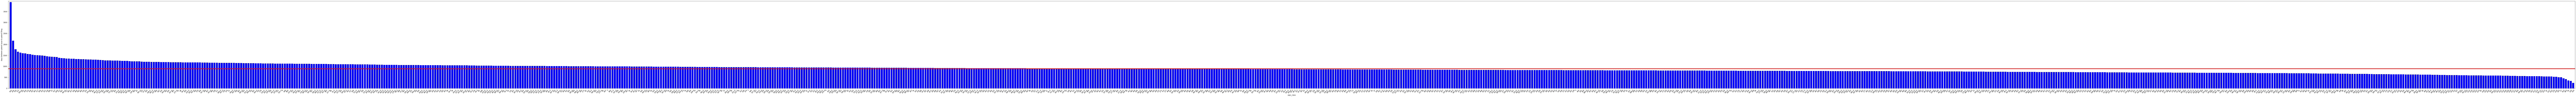

In [69]:
x_axis = np.arange(len(uspc_class_summary_df['average_days']))
plt.bar(x_axis, uspc_class_summary_df['average_days'], color="b", align="center")


plt.xticks(x_axis, uspc_class_summary_df.index, rotation=45)


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class_summary_df['average_days'])+50)

plt.xlabel("uspc_class")
plt.ylabel("days between patent issue to patent filing")

plt.axhline(y=uspc_class_summary_df['average_days'].mean(), color='r', linestyle='solid', linewidth = 4)

fig.savefig('application_data_3', dpi=100)

plt.show()

In [70]:
# #alternative method to generate the DataFrame using loop
# total_application_byclass = []
# total_delta_byclass = []

# uspc_class_list_items = m_resetindex['uspc_class'].unique()

# for uspc_class_item in uspc_class_list_items:
#     summed_cases = 0
#     summed_delta = 0
    
#     df2 = m_resetindex.loc[m_resetindex['uspc_class'] == uspc_class_item]
    
#     summed_cases = df2['patented_cases_per_class'].sum()
#     total_application_byclass.append(summed_cases)
    
#     summed_delta = df2['total_delta'].sum()
#     total_delta_byclass.append(summed_delta)

# # print(total_application_byclass)
# # print(total_delta_byclass)
        
# uspc_class_summary_df = pd.DataFrame({
#     "uspc_class": uspc_class_list_items,
#     "total_application_byclass": total_application_byclass,
#     "total_delta_byclass": total_delta_byclass
# })

# uspc_class_summary_df.tail(5)

In [71]:
# Section below will check on patented rate by uspc_class. Looser requirements below since only checking on patented rate.

In [72]:
application_cleaned.head(5)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,2000161,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,2022946,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2032617,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,2045760,1948-08-23,NaN,NaN,NaN,nan,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,2048602,NaN,NaN,NaN,NaN,nan,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED


In [73]:
application_cleaned_groupbyclass = application_cleaned.groupby(['uspc_class'])
application_cleaned_groupbyclass.count()
application_cleaned_groupbyclass_pd = pd.DataFrame(application_cleaned_groupbyclass.count())
application_cleaned_groupbyclass_pd
# application_cleaned_class_pd.index

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1
0.0,57317,57317,57317,4959,57317,57317,57316,57287,57287,57317,0,0,0,0,0,57317,57317
000,23682,23608,21810,813,13724,22629,14583,23594,23594,23682,10086,0,0,8963,8963,23586,23682
001,166150,166126,166150,166143,166150,166149,164790,161946,161946,166150,12,1,1,12,12,166150,166150
002,19519,19512,19518,18745,19518,18983,16697,19326,19326,19519,8901,9504,9504,12309,12309,19518,19519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D99,2099,2098,2099,2088,2099,2092,1820,2064,2064,2099,1072,2,2,2050,2050,2099,2099
ENG,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1
PLT,28001,27992,28001,27880,28001,27994,18278,27760,27760,28001,10066,8341,8341,26813,26813,28000,28001


In [74]:
# Check the uspc_class that has the most applications
application_cleaned_groupbyclass_pd.sort_values(["application_number"], ascending = False).head(10)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
nan,4731840,1499423,4729227,0,975,0,1416781,1293762,1293762,4731840,300237,7,7,6277,6277,1510281,1546746
514,197592,196994,197591,172589,197561,187191,193236,195337,195337,197592,69124,98341,98341,103986,103986,197590,197589
424,169736,169540,169735,157431,169705,167074,162179,167405,167405,169736,58012,96265,96265,82380,82380,169715,169736
435,169441,168937,169439,153852,169406,165604,165089,167158,167158,169441,59631,86654,86654,81763,81763,169438,169439
001,166150,166126,166150,166143,166150,166149,164790,161946,161946,166150,12,1,1,12,12,166150,166150
370,152543,152482,152543,140447,152540,151608,149779,150349,150349,152543,23676,104327,104327,102795,102795,152542,152543
257,149036,149008,149036,142512,149035,148700,147468,146721,146721,149036,30899,111722,111722,107209,107209,149034,149036
428,127361,127275,127361,120070,127355,126627,121990,126183,126183,127361,61647,60153,60153,79088,79088,127351,127361
705,122381,122317,122381,118119,122380,121919,118023,119084,119084,122381,6317,98832,98832,38507,38507,122380,122380


In [75]:
application_cleaned_groupbyclass_pd['application_number'].sum()  # indicate the total applications that has a uspc_class value

15494295

In [76]:
# Make a DataFrame to get ready for the final patented rate DataFrame

In [77]:
application_cleaned_groupbyclass_pd["application_number"]
application_cleaned_groupbyclass_pd_application_number = pd.DataFrame(application_cleaned_groupbyclass_pd["application_number"])
application_cleaned_groupbyclass_pd_application_number

application_cleaned_groupbyclass_pd_application_number.reset_index(inplace=True)
application_cleaned_groupbyclass_pd_application_number
application_cleaned_groupbyclass_pd_application_number = application_cleaned_groupbyclass_pd_application_number.rename(columns = {'application_number':'application_number_all'})
application_cleaned_groupbyclass_pd_application_number

,uspc_class,application_number_all
0,0,1
1,0.0,57317
2,000,23682
3,001,166150
4,002,19519
...,...,...
1072,D99,2099
1073,ENG,1
1074,PLT,28001
1075,XXX,46


In [78]:
# Get a DataFrame that only picks up patented cases and go through same steps as above

application_cleaned_patented = application_cleaned.loc[(application_cleaned["appl_status_desc"] == "Patented Case") | (application_cleaned["appl_status_desc"] == "Patented File - (Old Case Added for File Tracking Purposes)") , :]
application_cleaned_patented.head()
application_cleaned_patented.to_csv("csv_output/application_cleaned_patented.csv")

In [79]:
application_cleaned_patented.groupby(['uspc_class'])
application_cleaned_patented.groupby(['uspc_class']).count()

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
uspc_class,,,,,,,,,,,,,,,,,
000,8766,8697,6914,0,141,8766,38,8766,8766,8766,8759,0,0,8704,8704,8700,8766
001,7,7,7,7,7,7,7,7,7,7,6,1,1,7,7,7,7
002,5267,5267,5266,5094,5267,5266,4662,5267,5267,5267,2470,2587,2587,5267,5267,5266,5267
003,104,103,104,0,104,103,61,104,104,104,104,0,0,103,103,103,104
004,3513,3513,3513,3371,3513,3513,3090,3513,3513,3513,1592,1754,1754,3513,3513,3513,3513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D99,2017,2016,2017,2013,2017,2017,1757,2017,2017,2017,1064,0,0,2017,2017,2017,2017
ENG,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1
PLT,26454,26454,26454,26418,26454,26452,16989,26454,26454,26454,9672,7326,7326,26454,26454,26454,26454


In [80]:
application_cleaned_patented_groupbyclass = pd.DataFrame(application_cleaned_patented.groupby(['uspc_class']).count())
application_cleaned_patented_groupbyclass

application_cleaned_patented_groupbyclass["application_number"]
application_cleaned_patented_groupbyclass_application_number = pd.DataFrame(application_cleaned_patented_groupbyclass["application_number"])
application_cleaned_patented_groupbyclass_application_number

application_cleaned_patented_groupbyclass_application_number.reset_index(inplace=True)
application_cleaned_patented_groupbyclass_application_number = application_cleaned_patented_groupbyclass_application_number.rename(columns = {'application_number':'application_number_patented'})
application_cleaned_patented_groupbyclass_application_number

,uspc_class,application_number_patented
0,000,8766
1,001,7
2,002,5267
3,003,104
4,004,3513
...,...,...
1055,D99,2017
1056,ENG,1
1057,PLT,26454
1058,XXX,36


In [81]:
# Have an inner merge for two DataFrame above

uspc_class = pd.merge(application_cleaned_groupbyclass_pd_application_number, application_cleaned_patented_groupbyclass_application_number, on=["uspc_class"])
uspc_class

,uspc_class,application_number_all,application_number_patented
0,000,23682,8766
1,001,166150,7
2,002,19519,5267
3,003,105,104
4,004,13339,3513
...,...,...,...
1055,D99,2099,2017
1056,ENG,1,1
1057,PLT,28001,26454
1058,XXX,46,36


In [82]:
uspc_class["application_number_all"].max()
uspc_class.loc[uspc_class["application_number_all"] == 196500, :]

,uspc_class,application_number_all,application_number_patented


In [83]:
uspc_class['patented_rate'] = uspc_class['application_number_patented'] / uspc_class['application_number_all']

uspc_class['patented_rate'].astype(float)

pd.set_option('display.max_rows', None)
uspc_class = uspc_class.sort_values(["patented_rate"], ascending = False)
uspc_class
uspc_class['patented_rate'] = uspc_class['patented_rate'].map("{:.4%}".format)
uspc_class.head()

,uspc_class,application_number_all,application_number_patented,patented_rate
981,837,1,1,100.0000%
56,061,16,16,100.0000%
410,287,2,2,100.0000%
723,456,1,1,100.0000%
144,133,22,22,100.0000%


In [84]:
uspc_class['patented_rate'].head()

981    100.0000%
56     100.0000%
410    100.0000%
723    100.0000%
144    100.0000%
Name: patented_rate, dtype: object

In [85]:
uspc_class['patented_rate'] = uspc_class['patented_rate'].map(lambda x: x.rstrip('%'))
uspc_class['patented_rate'] = pd.to_numeric(uspc_class['patented_rate'])
uspc_class['uspc_class'] = uspc_class['uspc_class'].astype(str)

In [86]:
uspc_class.dtypes

uspc_class                      object
application_number_all           int64
application_number_patented      int64
patented_rate                  float64
dtype: object

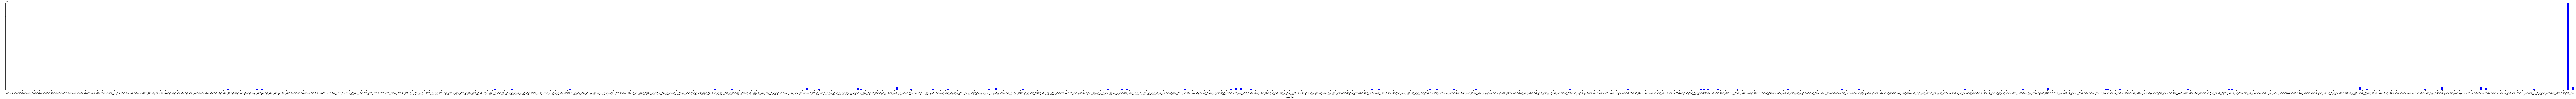

In [87]:
# chart shows the total applicaiton numbers by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")

plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)

fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)

plt.xlabel('uspc_class')
plt.ylabel('application_number_all')

fig.savefig('application_data_4', dpi=100)

plt.show()

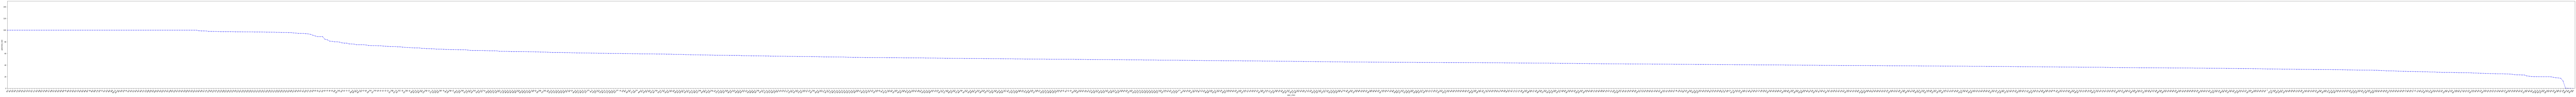

In [88]:
# chart shows the patented rate by uspc_class

plt.plot(x_axis, uspc_class['patented_rate'], marker="+",color="blue", linewidth=1, label="patented_rate")


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)



fig1 = plt.gcf()
fig1.set_size_inches(300.5, 10.5)

plt.xlim(-0.1, len(x_axis)-0.1)
plt.ylim(0, max(uspc_class['patented_rate'])+50)

plt.xlabel('uspc_class')
plt.ylabel('patented_rate')

fig1.savefig('application_data_5', dpi=100)

plt.show()

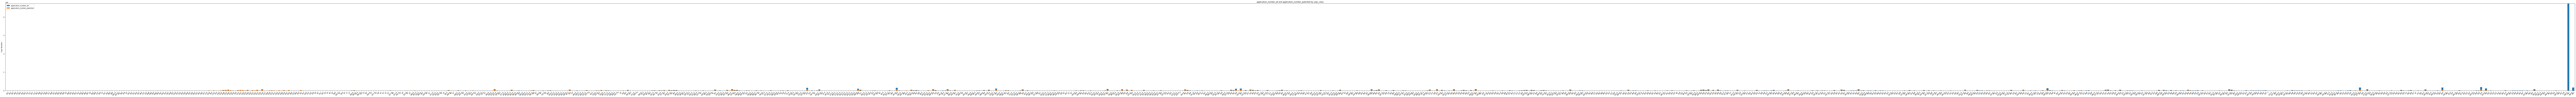

In [89]:
# chart shows the patented/all cases stacked by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
# plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")


fig, ax = plt.subplots()

ax.bar(x_axis, uspc_class['application_number_all'], label='application_number_all')
ax.bar(x_axis, uspc_class['application_number_patented'], bottom=0,
       label='application_number_patented')


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)


ax.set_ylabel('Case Number')
ax.set_title('application_number_all and application_number_patented by uspc_class')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)


fig.savefig('application_data_6', dpi=100)

plt.show()

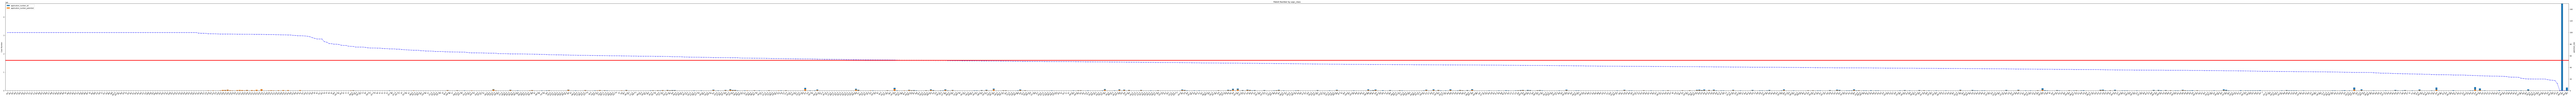

In [90]:
# chart shows the patented/all cases stacked by uspc_class and patented rate by uspc_class

x_axis = np.arange(len(uspc_class['application_number_all']))
# plt.bar(x_axis, uspc_class['application_number_all'], color="b", align="center")


fig, ax = plt.subplots()

ax.bar(x_axis, uspc_class['application_number_all'], label='application_number_all')
ax.bar(x_axis, uspc_class['application_number_patented'], bottom=0,
       label='application_number_patented')


plt.xticks(x_axis, uspc_class['uspc_class'], rotation=45)


ax.set_ylabel('Case Number')
ax.set_title('Patent Number by uspc_class')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(300.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(uspc_class['application_number_all'])+5000)



axes2 = plt.twinx()
axes2.plot(x_axis, uspc_class['patented_rate'], marker="+",color="blue", linewidth=1, label="patented_rate")
fig1 = plt.gcf()
axes2.set_ylim(0, max(uspc_class['patented_rate'])+50)
axes2.set_ylabel('patented_rate')

plt.axhline(y=uspc_class['patented_rate'].mean(), color='r', linestyle='solid', linewidth = 4)

fig.savefig('application_data_7', dpi=100)

plt.show()

In [91]:
# uspc_class["patented_rate"].describe()

In [92]:
uspc_class_sort = uspc_class.sort_values(["application_number_all", "patented_rate"], ascending = [False, False])
uspc_class_sort.head(30)

,uspc_class,application_number_all,application_number_patented,patented_rate
1059,nan,4731840,8678,0.1834
788,514,197592,51361,25.9935
662,424,169736,53299,31.4011
686,435,169441,46620,27.5140
1,001,166150,7,0.0042
561,370,152543,80502,52.7733
363,257,149036,81495,54.6814
670,428,127361,47041,36.9352
906,705,122381,31340,25.6086
721,455,113340,57809,51.0049


In [93]:
# Merge uspc_class_summary_df (about period required for patented by uspc_class) and uspc_class_sort (patented rate by uspc_class)

In [94]:
uspc_class_summary_df_resetindex  = uspc_class_summary_df.reset_index()
uspc_class_summary_df_resetindex.head()

,uspc_class,patented_cases_per_class,total_delta,average_days,average_years
0,924,1,3927,3927.000000,10.758904
1,199,2,4343,2171.500000,5.949315
2,705,31339,55891411,1783.445898,4.886153
3,715,17689,29536041,1669.740573,4.574632
4,930.0,2,3259,1629.500000,4.464384


In [95]:
uspc_class_daysandrate = pd.merge(uspc_class_sort, uspc_class_summary_df_resetindex, how='inner', on=['uspc_class'])
uspc_class_daysandrate = uspc_class_daysandrate[['uspc_class', 'application_number_all', 'application_number_patented', 'patented_rate', 'patented_cases_per_class', 'average_years']]
uspc_class_daysandrate.head()

,uspc_class,application_number_all,application_number_patented,patented_rate,patented_cases_per_class,average_years
0,nan,4731840,8678,0.1834,29,2.231649
1,514,197592,51361,25.9935,51360,2.751405
2,424,169736,53299,31.4011,53275,3.146208
3,435,169441,46620,27.5140,46619,3.309470
4,001,166150,7,0.0042,7,3.587867


In [96]:
# the application_number_patented and patented_cases_per_class are not exactly the same from the two DataFrames, why? 
# application_number_patented is generated from (application_cleaned_patented.groupby(['uspc_class'])
# patented_cases_per_class is generated from (application_cleaned_nona.groupby(['uspc_class'])) which has stricter requirements

In [97]:
uspc_class_daysandrate.dtypes

uspc_class                      object
application_number_all           int64
application_number_patented      int64
patented_rate                  float64
patented_cases_per_class         int64
average_years                  float64
dtype: object

In [98]:
application_cleaned_nona.head(5)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator,patent_issue_and_file_date_delta
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED,23363
28,2565523,1944-11-28,Utility,"HUNT, BROOKS H",2204,419,002000,NaN,Patented Case,1992-07-09,FILE REPOSITORY (FRANCONIA),2018-06-22,NaN,NaN,5132080,1992-07-21,PRODUCTION OF ARTICLES FROM POWDERED METALS,UNDISCOUNTED,17402
29,2568368,1944-12-15,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-12-26,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6175625,2001-01-16,NaN,UNDISCOUNTED,20486
33,2591067,1945-04-30,Utility,NaN,2202,179,00150M,NaN,Patented Case,1980-07-22,FILE REPOSITORY (FRANCONIA),1999-06-10,NaN,NaN,4214126,1980-07-22,NaN,UNDISCOUNTED,12867
34,2602618,1945-06-30,Utility,"BENTLEY, STEPHEN",2201,999,005000,NaN,Patented Case,1990-07-18,FILE REPOSITORY (FRANCONIA),2018-08-07,NaN,NaN,4956612,1990-09-11,MAGNETIC MINE FIRING CIRCUIT,UNDISCOUNTED,16509


In [99]:
application_cleaned_nona.dtypes

application_number                  object
filing_date                         object
application_invention_type          object
examiner_full_name                  object
examiner_art_unit                   object
uspc_class                          object
uspc_subclass                       object
atty_docket_number                  object
appl_status_desc                    object
appl_status_date                    object
file_location                       object
file_location_date                  object
earliest_pgpub_number               object
earliest_pgpub_date                 object
patent_number                       object
patent_issue_date                   object
invention_title                     object
small_entity_indicator              object
patent_issue_and_file_date_delta     int64
dtype: object

In [100]:
application_cleaned.head(10)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,2000161,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,2022946,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2032617,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,2045760,1948-08-23,NaN,NaN,NaN,nan,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,2048602,NaN,NaN,NaN,NaN,nan,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED
5,2081957,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
6,2089162,NaN,Utility,NaN,NaN,nan,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED
8,2122612,1937-01-27,NaN,NaN,NaN,000,000000,NaN,Patented File - (Old Case Added for File Track...,1992-10-13,FILE REPOSITORY (FRANCONIA),1993-03-16,NaN,NaN,2107431,1938-02-08,ANTISKID CROSS CHAINS,UNDISCOUNTED
9,2122769,1949-10-21,NaN,NaN,NaN,nan,NaN,NaN,Patented File - (Old Case Added for File Track...,1987-11-04,FILE REPOSITORY (FRANCONIA),1988-05-03,NaN,NaN,2708722,1955-01-13,NaN,UNDISCOUNTED


In [101]:
application_cleaned.dtypes

application_number            object
filing_date                   object
application_invention_type    object
examiner_full_name            object
examiner_art_unit             object
uspc_class                    object
uspc_subclass                 object
atty_docket_number            object
appl_status_desc              object
appl_status_date              object
file_location                 object
file_location_date            object
earliest_pgpub_number         object
earliest_pgpub_date           object
patent_number                 object
patent_issue_date             object
invention_title               object
small_entity_indicator        object
dtype: object

In [102]:
uspc_class_all.head()

,uspc_class
0,nan
1,380
2,000
3,419
4,179


In [103]:
# uspc_class_all = uspc_class_all.dropna().drop(columns=["index_for_uspc_class"])
uspc_class_all.head()

,uspc_class
0,nan
1,380
2,000
3,419
4,179


In [104]:
# uspc_class_all.loc[uspc_class_all["uspc_class" = NaN]]

In [105]:
# uspc_class_all["index_for_uspc_class"] = uspc_class_all.index+1

In [106]:
uspc_class_all.head()

,uspc_class
0,nan
1,380
2,000
3,419
4,179


In [16]:
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

In [3]:
# # Create database connection
# rds_connection_string = "postgres:useyourpassword@localhost:5432/ETL_USPTO"
# engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
# below are steps parallel to app.py in C:\Users\gongl\Desktop\DS_Bootcamp_2021class\Homework\ETL-USPTO-HEROKU

In [4]:
# Create database connection
rds_connection_string = "secret"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [9]:
from sqlalchemy.ext.automap import automap_base

In [14]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Base.classes.keys()

['patent_claims_stats',
 'application_cleaned_all',
 'uspc_class_all',
 'application_cleaned_patented',
 'uspc_class_daysandrate',
 'uspc_attorney_success_withnames',
 'attorney_success_withnames']

In [17]:
uspc_class_all_mo = Base.classes.uspc_class_all

# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
prcp = session.query(uspc_class_all_mo.uspc_class).all()

In [28]:
list(prcp)

[('nan'),
 ('380'),
 ('000'),
 ('419'),
 ('179'),
 ('999'),
 ('423'),
 ('178'),
 ('376'),
 ('075'),
 ('114'),
 ('102'),
 ('095'),
 ('367'),
 ('327'),
 ('073'),
 ('057'),
 ('343'),
 ('228'),
 ('455'),
 ('521'),
 ('342'),
 ('149'),
 ('526'),
 ('329'),
 ('375'),
 ('D00'),
 ('250'),
 ('244'),
 ('340'),
 ('560'),
 ('023'),
 ('089'),
 ('332'),
 ('310'),
 ('363'),
 ('315'),
 ('117'),
 ('239'),
 ('440'),
 ('324'),
 ('524'),
 ('360'),
 ('060'),
 ('364'),
 ('200'),
 ('198'),
 ('065'),
 ('562'),
 ('034'),
 ('264'),
 ('219'),
 ('427'),
 ('226'),
 ('002'),
 ('260'),
 ('320'),
 ('252'),
 ('086'),
 ('356'),
 ('074'),
 ('525'),
 ('338'),
 ('585'),
 ('435'),
 ('025'),
 ('176'),
 ('015'),
 ('546'),
 ('428'),
 ('307'),
 ('029'),
 ('055'),
 ('156'),
 ('372'),
 ('359'),
 ('318'),
 ('106'),
 ('417'),
 ('132'),
 ('138'),
 ('287'),
 ('528'),
 ('126'),
 ('416'),
 ('004'),
 ('355'),
 ('358'),
 ('148'),
 ('409'),
 ('028'),
 ('353'),
 ('220'),
 ('137'),
 ('044'),
 ('181'),
 ('XXX'),
 ('030'),
 ('128'),
 ('062'),


In [27]:
for el in prcp:
    print(el)
    break

('nan',)


In [5]:
# Confirm tables
engine.table_names()

['patent_claims_stats',
 'application_cleaned_all',
 'all_inventors',
 'application_cleaned_patented',
 'uspc_class_all',
 'uspc_class_daysandrate',
 'uspc_attorney_success_withnames',
 'attorney_success_withnames']

In [ ]:
# Load DataFrames into database
uspc_class_all.to_sql(name='uspc_class_all', con=engine, if_exists='append', index=False)

In [ ]:
uspc_class_all_read = pd.read_sql_query('select * from uspc_class_all', con=engine)

In [ ]:
uspc_class_all_read.head()

In [ ]:
# Load DataFrames into database
uspc_class_daysandrate.to_sql(name='uspc_class_daysandrate', con=engine, if_exists='append', index=False)

In [ ]:
uspc_class_daysandrate_read = pd.read_sql_query('select * from uspc_class_daysandrate', con=engine)

In [ ]:
uspc_class_daysandrate_read.head()

In [ ]:
# application_cleaned.dtypes

In [ ]:
# application_cleaned.head()

In [ ]:
# application_cleaned.loc[application_cleaned['uspc_class'] == 60]

In [ ]:
# application_cleaned.to_csv("motest.csv", index=False)

In [ ]:
# uspc_class_new = application_cleaned['uspc_class']
application_cleaned.drop("uspc_class_string", axis = 1, inplace = True)

In [ ]:
# Load DataFrames into database
application_cleaned.to_sql(name='application_cleaned_all', con=engine, if_exists='append', index=False)

In [ ]:
application_cleaned_read = pd.read_sql_query('select * from application_cleaned_all', con=engine)

In [ ]:
# application_cleaned_read.head(5)

In [110]:
# Load DataFrames into database
application_cleaned_nona.to_sql(name='application_cleaned_patented', con=engine, if_exists='append', index=False)

In [ ]:
# application_cleaned_patented_read = pd.read_sql_query('select * from application_cleaned_patented', con=engine)

In [ ]:
# application_cleaned_patented_read.head(5)

In [ ]:
# My interested class are listed here:

In [ ]:
uspc_class_gong = uspc_class_daysandrate.loc[(uspc_class_daysandrate["uspc_class"] == "D25") 
               | (uspc_class_daysandrate["uspc_class"] == "D12") 
               | (uspc_class_daysandrate["uspc_class"] == "074") 
               | (uspc_class_daysandrate["uspc_class"] == "052") 
               | (uspc_class_daysandrate["uspc_class"] == "405"), :]
uspc_class_gong.sort_values(['patented_rate'], ascending = False)

In [ ]:
# Since D25 and D12 have close patented rate, making me interested to check on their property: patent_issue_and_file_date_delta